# Hotel Booking Management

In the scenario where flight cancellations are raised as an alert issue to both travellers and hotel managers, we want to apply machine learning and deep learning concepts to improve hotel management process.

**Dataset:**

The data is originally from the article [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019. The data is downloaded at [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand?datasetId=511638&sortBy=voteCount).

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted.

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

**Goals:**

- The best time of year to book a hotel room.
- The optimal length of stay in order to get the best daily rate.
- Predict whether or not a hotel was likely to receive a disproportionately high number of special requests. 
- Predict the Lead time.
- Predict revenue (ADR) (per day or per period).
- Number of guests (per day or per period)

# Preprocessing: 
Clean the dataset, providing notation describing the choices made.



## Import packages and data

In [ ]:
# Import packages
import numpy as np
import pandas as pd 

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import matplotlib.dates as mdates
import datetime as dt

from sklearn.metrics import mean_squared_error
import math

In [ ]:
# Import data
data = pd.read_csv("hotel_bookings.csv")
data.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
# generate interactive pandas report to explore the data

# from pandas_profiling import ProfileReport
# profile = ProfileReport(data)
# profile.to_file("Hotel_analysis.html")

## Data information 

In [ ]:
# Info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Describe data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Check null value
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

The PMS assured no missing data exists in its database tables. However, in some categorical variables like Agent or Company, “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent. 

We will create feature engineering to handle missing data.

## Feature engineering

#### Duplicated values

In [ ]:
data.duplicated().sum()

31994

There are quite a lot duplication rows, which might create overlap information. Therefore, we will create those rows that were duplicated.

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

#### Missing data

Only 4 data are missing in children , hence, it is not a problem. We replace the null values for children with 0, and name countries with missing values as 'UNK' representing unknown

In [ ]:
# Fill in missing values
data['children'] = data['children'].fillna(0)
data['country'] = data['country'].fillna('UNK')

In [ ]:
# Total number of people for each booking
data['people'] = data['adults'] + data['children']

In [ ]:
# Generate number value for 'arrival_date_month'
def month_num(val):
    if val=='January':
        return 1
    elif val=='February':
        return 2
    elif val=='March':
        return 3
    elif val=='April':
        return 4
    elif val=='May':
        return 5
    elif val=='June':
        return 6
    elif val=='July':
        return 7
    elif val=='August':
        return 8
    elif val=='September':
        return 9
    elif val=='October':
        return 10
    elif val=='November':
        return 11
    elif val=='December':
        return 12

data['month']=data['arrival_date_month'].apply(lambda r: month_num(r))

In [ ]:
# Calculate total previous booking
data['previous_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

In [ ]:
# Check for mismanagement
data['mismanagement'] = data['reserved_room_type'] != data['assigned_room_type']

In [ ]:
def staying(cancel):
  if cancel == 1:
    stay = 0
  else:
    stay = 1
  return stay 

# staying customer
data['is_stayed'] = data['is_canceled'].apply(lambda r: staying(r))

In [ ]:
# drop agent and company ID, and country, which are not useful for our analysis
# data = data.drop(["agent","company","country"], axis='columns')

## Exploratory data analysis



### Where do most guests come from?

In [ ]:
country_guests = data[data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_guests.columns = ['country', 'No of guests']
country_guests

,country,No of guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_guests, locations = country_guests['country'],
                           color = country_guests['No of guests'], hover_name = country_guests['country'])
guests_map.show()

People from all over the world had visited and stayed in these two hotels. Most guests are from Portugal, Britain, and France.

### Which hotel has a high number of booking?

- City hotel has higher bookings.



In [ ]:
# compare booking between each hotel 
fig_hotel = px.histogram(data, x="hotel", 
             color='is_canceled', barmode='group',
             title="Which hotel has high number of booking?",
             height=400)
fig_hotel.show()

### What is the total reservation status through years?

In [ ]:
## count reserevation status through years
# set up data
df_reserve = data.groupby(['reservation_status_date','reservation_status']).size().reset_index(name='counts')

# plot 
fig_reserve_status = px.line(df_reserve, x='reservation_status_date', y='counts', color='reservation_status',
              title='What is the total reservation status through years?')

fig_reserve_status.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

# show
fig_reserve_status.show()

On 1st Jan October 2015, there was a booming number of cancellations. In the last 6 months of the data timeframe, a number of check-outs had outweighted the total number of caneled reservation. Even though a number of no-show reservations has always been the lowest of all, it still remained unchanged from July 2015 to July 2017, which was about 2 booking a day.

### Can we reduce booking cancellation with deposit function?

In [ ]:
df_deposit = data.groupby(['deposit_type','is_canceled']).size().reset_index(name='counts')
df_deposit

,deposit_type,is_canceled,counts
0,No Deposit,0,63235
1,No Deposit,1,23016
2,Non Refund,0,55
3,Non Refund,1,983
4,Refundable,0,81
5,Refundable,1,26


In [ ]:
### Can we reduce booking cancellation with deposit function?
## prepare data
df_deposit = data.groupby(['deposit_type','is_canceled']).size().reset_index(name='counts')
labels = sorted(df_deposit['deposit_type'].unique())
value_0 = df_deposit.loc[df_deposit['is_canceled']==0].sort_values(by ='deposit_type')['counts']
value_1 = df_deposit.loc[df_deposit['is_canceled']==1].sort_values(by ='deposit_type')['counts']

## plot
# Create subplots
fig_deposit = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_deposit.add_trace(go.Pie(labels=labels, values=value_0,scalegroup='one', name="Not canceled"), 1, 1)
fig_deposit.add_trace(go.Pie(labels=labels, values=value_1,scalegroup='one', name="Canceled"), 1, 2)

# Create a donut-like pie chart
fig_deposit.update_traces(hole=.4, hoverinfo="label+percent+name")

fig_deposit.update_layout(
    title_text="Can we reduce booking cancellation with deposit function?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Not', x=0.19, y=0.55, font_size=18, showarrow=False),
                 dict(text='canceled', x=0.15, y=0.47, font_size=18, showarrow=False),
                 dict(text='Canceled', x=0.83, y=0.5, font_size=16, showarrow=False)])

# show
fig_deposit.show()

In the "Canceled" pie, surprisingly, nearly 4% of cancelations were made even though customers paid deposit under non refundable scheme. However, no deposit scheme still accounts great percentage in cancelation bookings. 
 
And 99.7% successful bookings were made on this scheme. It seems that "No Deposit" is the most favourable option, and "Refundable" is the least one.

### What kind of hotel and rooms do customers choose to book for non-refundable scheme?

In [ ]:
non_refund = data[data['deposit_type'] == 'Non Refund']

fig_non_refund = px.histogram(non_refund, x="assigned_room_type", color="hotel")
fig_non_refund.show()

It clears that customers were only willing to choose non-refundable option for room type A.

### Which market segment has high cancelations?

In [ ]:
### Which market segment has high cancelations?

## Prepare data
df_segment = data.groupby(['market_segment','is_canceled']).size().reset_index(name='counts')
labels = sorted(df_segment['market_segment'].unique())
value_0 = df_segment.loc[df_segment['is_canceled']==0].sort_values(by ='market_segment')['counts']
value_1 = df_segment.loc[df_segment['is_canceled']==1].sort_values(by ='market_segment')['counts']

## Plot
# Create subplots
fig_segment = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_segment.add_trace(go.Pie(labels=labels, values=value_0,scalegroup='one', name="Not canceled"), 1, 1)
fig_segment.add_trace(go.Pie(labels=labels, values=value_1,scalegroup='one', name="Canceled"), 1, 2)

# Create a donut-like pie chart
fig_segment.update_traces(hole=.4, hoverinfo="label+percent+name")

fig_segment.update_layout(
    title_text="Which market segment has high cancelations?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Not', x=0.19, y=0.55, font_size=20, showarrow=False),
                 dict(text='canceled', x=0.15, y=0.47, font_size=20, showarrow=False),
                 dict(text='Canceled', x=0.845, y=0.5, font_size=19, showarrow=False)])

# show
fig_segment.show()

As shown in the second pie chart, nearly 76% of canceled booking was from 'Online TA' segment, while this channel contributed only 53% for successed booking. In contrast, 'Offline TA/TO' and 'Direct' segment have more successful booking rate, which are 19% and 16% respectively.

### Which distribution channel has high cancelations?

In [ ]:
### Which distribution channel has high cancelations?
## prepare data
df_channel = data.groupby(['distribution_channel','is_canceled']).size().reset_index(name='counts')
labels = sorted(df_channel['distribution_channel'].unique())
value_0 = df_channel.loc[df_channel['is_canceled']==0].sort_values(by ='distribution_channel')['counts']
value_1 = df_channel.loc[df_channel['is_canceled']==1].sort_values(by ='distribution_channel')['counts']

## plot
# Create subplots
fig_channel = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig_channel.add_trace(go.Pie(labels=labels, values=value_0,scalegroup='one', name="Not canceled"), 1, 1)
fig_channel.add_trace(go.Pie(labels=labels, values=value_1,scalegroup='one', name="Canceled"), 1, 2)

# Create a donut-like pie chart
fig_channel.update_traces(hole=.4, hoverinfo="label+percent+name")

fig_channel.update_layout(
    title_text="Which distribution channel has high cancelations?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Not', x=0.19, y=0.55, font_size=20, showarrow=False),
                 dict(text='canceled', x=0.15, y=0.47, font_size=20, showarrow=False),
                 dict(text='Canceled', x=0.845, y=0.5, font_size=19, showarrow=False)])

# show
fig_channel.show()

In terms of distribution channel, more than 90% of canceled booking was from TA/TO channel, while this channel contributed roughly 74% of succesful reservations, which lower than the number for canceled booking.

### Which month has the most bookings?



In [ ]:
## Which month has the most booking?
# prepare data
df_arrive = data.groupby(['arrival_date_year','month']).size().reset_index(name='counts')
df_arrive = df_arrive.pivot(index='arrival_date_year', columns='month', values='counts')
df_arrive = df_arrive.sort_index(axis=1)
# plot
fig_arrive = px.imshow(df_arrive.values,
                labels=dict(x="Month of arrival", y="Year of arrival", color="Productivity"),
                x=['January','February','March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'],
                y=['2015','2016','2017'],
                title = 'Which month has the most booking? (counts of bookings)'
               )
fig_arrive.update_xaxes(side="top")
fig_arrive.show()

According to above heatmap, total number of booking has gradually increased through years. While Autumn (August to October) is the season that had the highest number of reservation in 2016, the month that has the most booking in 2017 was in Summer (from May till August).

### How does the price vary per night over the year?

In [ ]:
# Filter data
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

# Compute the mean for each month for each hotel type
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

# Add data into 1 dataframe
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,76.841664,114.121066
1,August,182.103524,122.497179
2,December,63.977295,90.111067
3,February,53.624311,87.843338
4,January,48.542066,83.180097
5,July,150.914540,119.740148
6,June,108.970363,120.486062
7,March,57.083964,90.759820
8,May,77.725129,124.533785
9,November,48.928493,87.751507


In [ ]:
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Sort data by month
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,48.542066,83.180097
1,February,53.624311,87.843338
2,March,57.083964,90.759820
3,April,76.841664,114.121066
4,May,77.725129,124.533785
5,June,108.970363,120.486062
6,July,150.914540,119.740148
7,August,182.103524,122.497179
8,September,98.855456,116.723183
9,October,62.578195,105.140685


In [ ]:
# Visualise average price by month between 2 hotels
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Average room price per night over the Months')

<Figure size 1224x576 with 0 Axes>

Prices in the Resort hotel are much higher during the summer and prices of City hotel varies less and is most expensive during Spring and Autumn.

### Which are the most busy months?

In [ ]:
resort_guests = data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']

city_guests = data_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']

final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']

final_guests = sort_month(final_guests,'month')
final_guests

,month,no of guests in resort,no of guest in city hotel
0,January,1689,1966
1,February,2053,2630
2,March,2192,3491
3,April,2169,3330
4,May,2246,3667
5,June,1927,3484
6,July,3013,3846
7,August,3153,4481
8,September,1875,3173
9,October,2211,3081


In [ ]:
final_guests = sort_month(final_guests,'month')

px.line(final_guests, x = 'month', y = ['no of guests in resort','no of guest in city hotel'],
        title='Total no of guests per Months')

The City hotel has more guests during spring and autumn, when the prices are also the highest, In July and August there are less visitors, although prices are lower.

Guest numbers for the Resort hotel go down slighty from May to June and in September, and significantly go up in the summer, which is also when the prices are highest. 

Both hotels have the fewest guests during the winter.

## Dummy variables

In [ ]:
# defined function for get dummies data
def get_dummies(categorical_columns, new_df):
  # get dummies columns
  for col in categorical_columns:
    # take only categorical columns that is not date
    if col != 'reservation_status_date':
      dummies_columns = pd.get_dummies(new_df[col], prefix=col)
      new_df = pd.concat([new_df, dummies_columns], axis=1) # concat in data frame
      new_df = new_df.drop([col], axis=1) # drop original columns
    else:
      continue

  return new_df

In [ ]:
# get categorical columns 
categorical_columns = data.select_dtypes(include=['object']).columns

# create new dataframe
df = get_dummies(categorical_columns, data)
df.head(5).T

,0,1,2,3,4
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
...,...,...,...,...,...
customer_type_Transient,1,1,1,1,1
customer_type_Transient-Party,0,0,0,0,0
reservation_status_Canceled,0,0,0,0,0
reservation_status_Check-Out,1,1,1,1,1


## Correlation matrix

In [ ]:
# find correlation
corr = df.corr()

In [ ]:
# plot in heatmap
fig_corr = px.imshow(corr.values,
                labels=dict(color="Correlation"),
                x=corr.columns,
                y=corr.columns,
                title = 'Correlation matrix',
                width=2000, height=2000
               )
fig_corr.update_xaxes(side="top")
fig_corr.show()

The heatmap shows high correlation between "is_canceled" with "is_stayed", "reservation_statis_canceled". Hence, we need to drop it to build prediction model.

# Analysis:

Apply your interpretation of at least one analysis from each of the module’s Classes 2-6 to the dataset. There should be a table provided in the introduction which maps how the material from each class has been mapped to the analysis provided in your report. If there is a particular reason why the material from one of the Classes of the course cannot be carried out for your dataset, then explain this in the Table. A focus should be on the accuracy obtained from your machine learning code compared to naïve or baseline models.

Each of the analyses should consist of a set of code, the output, and an interpretation and implications from your analysis

## Machine Learning Workflows and Regression Machine Learning

- Bookings Cancellation Prediction.
- Customer Segmentation.

### Preprocessing

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,people,month,previous_bookings,mismanagement,is_stayed
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2.0,7,0,False,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,2.0,7,0,False,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1.0,7,0,True,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,1.0,7,0,False,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,2.0,7,0,False,1


In [ ]:
data_copy = data.copy()

# dropping columns that have high correlations with prediction values "is_canceled"

useless_col = ['arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list', 'is_stayed', "mismanagement"]

data_copy.drop(useless_col, axis = 1, inplace = True)

In [ ]:
# creating categorical dataframe

cat_cols = [col for col in data_copy.columns if data_copy[col].dtype == 'O']

cat_df = data_copy[cat_cols]

# cleaning categorical dataframe

cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

cat_df['year'] = cat_df['reservation_status_date'].dt.year

cat_df['month'] = cat_df['reservation_status_date'].dt.month

cat_df['day'] = cat_df['reservation_status_date'].dt.day

cat_df.drop(['reservation_status_date','arrival_date_month'], axis = 1, inplace = True)

# printing unique values of each column

for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
# encoding categorical variables

cat_df['hotel'] = cat_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

cat_df['meal'] = cat_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

cat_df['market_segment'] = cat_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

cat_df['distribution_channel'] = cat_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})

cat_df['reserved_room_type'] = cat_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})

cat_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0.0,0,0,0,7,1
1,0,0,0,0,0.0,0,0,0,7,1
2,0,0,0,0,1.0,0,0,0,7,2
3,0,0,1,1,1.0,0,0,0,7,2
4,0,0,2,2,1.0,0,0,0,7,3


In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel                 87396 non-null  int64  
 1   meal                  87396 non-null  int64  
 2   market_segment        87396 non-null  int64  
 3   distribution_channel  87396 non-null  int64  
 4   reserved_room_type    87390 non-null  float64
 5   deposit_type          87396 non-null  int64  
 6   customer_type         87396 non-null  int64  
 7   year                  87396 non-null  int64  
 8   month                 87396 non-null  int64  
 9   day                   87396 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 7.3 MB


In [ ]:
# creating numerical dataframe

num_df = data_copy.drop(columns = cat_cols, axis = 1)

# creating numerical dataframe

scaler = MinMaxScaler()

num_df = pd.DataFrame(scaler.fit_transform(num_df), columns = num_df.columns)

num_df

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,adr,required_car_parking_spaces,total_of_special_requests,people,month,previous_bookings
0,0.0,0.464043,0.500000,0.000000,0.000000,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.001180,0.0,0.0,0.036364,0.545455,0.0
1,0.0,1.000000,0.500000,0.000000,0.000000,0.00,0.036364,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.001180,0.0,0.0,0.036364,0.545455,0.0
2,0.0,0.009498,0.500000,0.000000,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.015053,0.0,0.0,0.018182,0.545455,0.0
3,0.0,0.017639,0.500000,0.000000,0.000000,0.02,0.018182,0.0,0.0,0.0,0.0,0.0,0.567416,NaN,0.015053,0.0,0.0,0.018182,0.545455,0.0
4,0.0,0.018996,0.500000,0.000000,0.000000,0.04,0.036364,0.0,0.0,0.0,0.0,0.0,0.447566,NaN,0.019307,0.0,0.2,0.036364,0.545455,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,0.0,0.031208,0.653846,0.966667,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,0.0,0.735955,NaN,0.018963,0.0,0.0,0.036364,0.636364,0.0
87392,0.0,0.138399,0.653846,1.000000,0.105263,0.10,0.054545,0.0,0.0,0.0,0.0,0.0,0.014981,NaN,0.042877,0.0,0.4,0.054545,0.636364,0.0
87393,0.0,0.046133,0.653846,1.000000,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,0.0,0.014981,NaN,0.030351,0.0,0.8,0.036364,0.636364,0.0
87394,0.0,0.147897,0.653846,1.000000,0.105263,0.10,0.036364,0.0,0.0,0.0,0.0,0.0,0.164794,NaN,0.020491,0.0,0.0,0.036364,0.636364,0.0


In [ ]:
num_df.var()

is_canceled                       0.199331
lead_time                         0.013633
arrival_date_week_number          0.069155
arrival_date_day_of_month         0.086733
stays_in_weekend_nights           0.002950
stays_in_week_nights              0.001687
adults                            0.000130
children                          0.002078
babies                            0.000129
is_repeated_guest                 0.037549
previous_cancellations            0.000202
previous_bookings_not_canceled    0.000579
agent                             0.044928
company                           0.059109
adr                               0.000104
required_car_parking_spaces       0.001238
total_of_special_requests         0.027685
people                            0.000203
month                             0.079297
previous_bookings                 0.000598
dtype: float64

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87396 entries, 0 to 87395
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87396 non-null  float64
 1   lead_time                       87396 non-null  float64
 2   arrival_date_week_number        87396 non-null  float64
 3   arrival_date_day_of_month       87396 non-null  float64
 4   stays_in_weekend_nights         87396 non-null  float64
 5   stays_in_week_nights            87396 non-null  float64
 6   adults                          87396 non-null  float64
 7   children                        87396 non-null  float64
 8   babies                          87396 non-null  float64
 9   is_repeated_guest               87396 non-null  float64
 10  previous_cancellations          87396 non-null  float64
 11  previous_bookings_not_canceled  87396 non-null  float64
 12  agent                           

In [ ]:
cat_df = cat_df.reset_index(drop=True)
num_df = num_df.reset_index(drop=True)

In [ ]:
# inspecting data

data_copy = pd.concat([cat_df, num_df], axis = 1)

data_copy.isnull().sum()

hotel                                 0
meal                                  0
market_segment                        0
distribution_channel                  0
reserved_room_type                    6
deposit_type                          0
customer_type                         0
year                                  0
month                                 0
day                                   0
is_canceled                           0
lead_time                             0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
agent                             12193
company                           82137
adr                                   0


In [ ]:
# handling missing values

# data_copy['adr'] = data_copy['adr'].fillna(value = num_df['adr'].mean()) # fill in one missing values

data_copy.drop(['agent','company'], axis = 1, inplace=True) # drop columns not use for analysis with great null values

data_copy.dropna(inplace=True) # drop null rows in the "reserved_room_type"


In [ ]:
data_copy.isnull().sum()

hotel                             0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year                              0
month                             0
day                               0
is_canceled                       0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
people                            0
month                             0
previous_bookings           

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87390 entries, 0 to 87395
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87390 non-null  int64  
 1   meal                            87390 non-null  int64  
 2   market_segment                  87390 non-null  int64  
 3   distribution_channel            87390 non-null  int64  
 4   reserved_room_type              87390 non-null  float64
 5   deposit_type                    87390 non-null  int64  
 6   customer_type                   87390 non-null  int64  
 7   year                            87390 non-null  int64  
 8   month                           87390 non-null  int64  
 9   day                             87390 non-null  int64  
 10  is_canceled                     87390 non-null  float64
 11  lead_time                       87390 non-null  float64
 12  arrival_date_week_number        

In [ ]:
X = data_copy.drop('is_canceled', axis = 1)
y = data_copy['is_canceled']

In [ ]:
X.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,people,month,previous_bookings
0,0,0,0,0,0.0,0,0,0,7,1,...,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.036364,0.545455,0.0
1,0,0,0,0,0.0,0,0,0,7,1,...,0.0,0.0,0.0,0.0,0.001180,0.0,0.0,0.036364,0.545455,0.0
2,0,0,0,0,1.0,0,0,0,7,2,...,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.018182,0.545455,0.0
3,0,0,1,1,1.0,0,0,0,7,2,...,0.0,0.0,0.0,0.0,0.015053,0.0,0.0,0.018182,0.545455,0.0
4,0,0,2,2,1.0,0,0,0,7,3,...,0.0,0.0,0.0,0.0,0.019307,0.0,0.2,0.036364,0.545455,0.0


In [ ]:
print(X.shape)
print(y.shape)

(87390, 27)
(87390,)


In [ ]:
# splitting data into training set and test set

trainX, otherX, trainY, otherY = train_test_split(X, y, test_size = 0.4, stratify = y,random_state = 726)

testX, validationX, testY, validationY = train_test_split(otherX, otherY, stratify = otherY, test_size = 0.5,random_state = 1592)

In [ ]:
# create data to retrain the model

trainX_final = pd.concat([pd.DataFrame(trainX), pd.DataFrame(validationX)])

trainY_final = pd.concat([pd.DataFrame(trainY), pd.DataFrame(validationY)])

### Bookings cancellation prediction

#### Logistic Regression

In [ ]:
#lr = LogisticRegression()
lr = LogisticRegression(n_jobs=1, C=1e5, max_iter = 5000) # iterations to improve model accuracy as the dataset have quite huge amount of variables

lr.fit(trainX, trainY)

y_pred_lr = lr.predict(validationX)

acc_lr = accuracy_score(validationY, y_pred_lr)

conf = confusion_matrix(validationY, y_pred_lr)

clf_report = classification_report(validationY, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.795857649616661
Confusion Matrix : 
[[12187   487]
 [ 3081  1723]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87     12674
         1.0       0.78      0.36      0.49      4804

    accuracy                           0.80     17478
   macro avg       0.79      0.66      0.68     17478
weighted avg       0.79      0.80      0.77     17478



In [ ]:
# Retrain the model

lr = LogisticRegression(n_jobs=1, C=1e5, max_iter = 5000)

lr.fit(trainX_final, trainY_final)

y_pred_lr = lr.predict(testX)

acc_lr = accuracy_score(testY, y_pred_lr)

conf = confusion_matrix(testY, y_pred_lr)

clf_report = classification_report(testY, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score of Logistic Regression is : 0.7971163748712667
Confusion Matrix : 
[[12197   477]
 [ 3069  1735]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87     12674
         1.0       0.78      0.36      0.49      4804

    accuracy                           0.80     17478
   macro avg       0.79      0.66      0.68     17478
weighted avg       0.79      0.80      0.77     17478



#### KNN

In [ ]:
knn = KNeighborsClassifier()

knn.fit(trainX, trainY)

y_pred_knn = knn.predict(validationX)

acc_knn = accuracy_score(validationY, y_pred_knn)

conf = confusion_matrix(validationY, y_pred_knn)

clf_report = classification_report(validationY, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8143952397299462
Confusion Matrix : 
[[11982   692]
 [ 2552  2252]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88     12674
         1.0       0.76      0.47      0.58      4804

    accuracy                           0.81     17478
   macro avg       0.79      0.71      0.73     17478
weighted avg       0.81      0.81      0.80     17478



In [ ]:
# Retrain the model

knn = KNeighborsClassifier()

knn.fit(trainX_final, trainY_final)

y_pred_knn = knn.predict(testX)

acc_knn = accuracy_score(testY, y_pred_knn)

conf = confusion_matrix(testY, y_pred_knn)

clf_report = classification_report(testY, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy Score of KNN is : 0.8256093374527979
Confusion Matrix : 
[[12098   576]
 [ 2472  2332]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89     12674
         1.0       0.80      0.49      0.60      4804

    accuracy                           0.83     17478
   macro avg       0.82      0.72      0.75     17478
weighted avg       0.82      0.83      0.81     17478



#### Gradient Boosting Classifier

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(trainX, trainY)

y_pred_gb = gb.predict(validationX)

acc_gb = accuracy_score(validationY, y_pred_gb)
conf = confusion_matrix(validationY, y_pred_gb)
clf_report = classification_report(validationY, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9233894038219476
Confusion Matrix : 
[[12612    62]
 [ 1277  3527]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     12674
         1.0       0.98      0.73      0.84      4804

    accuracy                           0.92     17478
   macro avg       0.95      0.86      0.90     17478
weighted avg       0.93      0.92      0.92     17478



In [ ]:
# Retrain the model

gb = GradientBoostingClassifier()
gb.fit(trainX_final, trainY_final)

y_pred_gb = gb.predict(testX)

acc_gb = accuracy_score(testY, y_pred_gb)
conf = confusion_matrix(testY, y_pred_gb)
clf_report = classification_report(testY, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score of Ada Boost Classifier is : 0.9192699393523286
Confusion Matrix : 
[[12608    66]
 [ 1345  3459]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95     12674
         1.0       0.98      0.72      0.83      4804

    accuracy                           0.92     17478
   macro avg       0.94      0.86      0.89     17478
weighted avg       0.92      0.92      0.92     17478



#### Ada Boost Classifier

In [ ]:
ada = AdaBoostClassifier()
ada.fit(trainX, trainY)

y_pred_ada = ada.predict(validationX)

acc_ada = accuracy_score(validationY, y_pred_ada)
conf = confusion_matrix(validationY, y_pred_ada)
clf_report = classification_report(validationY, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.812163863142236
Confusion Matrix : 
[[11906   768]
 [ 2515  2289]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     12674
         1.0       0.75      0.48      0.58      4804

    accuracy                           0.81     17478
   macro avg       0.79      0.71      0.73     17478
weighted avg       0.80      0.81      0.80     17478



In [ ]:
# retrain the model
ada = AdaBoostClassifier()
ada.fit(trainX_final, trainY_final)

y_pred_ada = ada.predict(testX)

acc_ada = accuracy_score(testY, y_pred_ada)
conf = confusion_matrix(testY, y_pred_ada)
clf_report = classification_report(testY, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Accuracy Score of Ada Boost Classifier is : 0.8141663805927452
Confusion Matrix : 
[[11941   733]
 [ 2515  2289]]
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     12674
         1.0       0.76      0.48      0.58      4804

    accuracy                           0.81     17478
   macro avg       0.79      0.71      0.73     17478
weighted avg       0.81      0.81      0.80     17478



#### Model Comparision

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Gradient Boosting Classifier', 'Ada Boost Classifier'],
    'Score' : [acc_lr, acc_knn, acc_gb, acc_ada]
})


models = models.sort_values(by = 'Score', ascending = True)
models

,Model,Score
0,Logistic Regression,0.797116
3,Ada Boost Classifier,0.814166
1,KNN,0.825609
2,Gradient Boosting Classifier,0.919270


In [ ]:
px.bar(data_frame = models, 
       x = 'Score', 
       y = 'Model', 
       color = 'Score', 
       title = 'Models Comparison')

### Customer Segmentation 

In [ ]:
from sklearn import decomposition as dcp
from sklearn.cluster import KMeans
import graphviz as gp
from IPython.display import SVG, display
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#### K-means

In [ ]:
# Choosing the right K

# The k-mean algorithm is carried out for a range of values k from 1 to 10 

inertia_K = []

K = range(1,11)

for k in K:

    kmeanModel = KMeans(n_clusters=k)

    kmeanModel.fit(X)
    
    inertia_K.append(kmeanModel.inertia_)

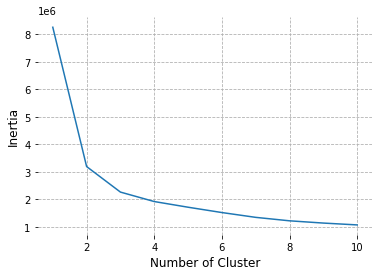

In [ ]:
# inertia =  sum(distance of each point in the cluster to the centroid of the cluster)^2

ax = plt.subplot(111)

plt.plot(K,inertia_K)
plt.grid(ls='--')

plt.xlabel('Number of Cluster', size=12)
plt.ylabel('Inertia', size=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [ ]:
# using the "elbow" method, we choose k = 3

kmeans = KMeans(n_clusters = 3).fit(X)

# getting clusters of each observation

kmeans.labels_

# gives us how close to the center of its cluster is every one of our features (columns)

kmeans.cluster_centers_

array([[6.11076023e-01, 5.61845561e-01, 2.05521391e+00, 1.65349201e+00,
        1.65053352e+00, 3.90586045e-02, 3.24468969e-01, 2.00385600e+00,
        6.28640761e+00, 2.57475318e+01, 1.09600255e-01, 5.11597401e-01,
        6.57120855e-01, 5.42499086e-02, 5.26928830e-02, 3.40282793e-02,
        1.45829871e-02, 1.02383406e-03, 3.79948808e-02, 9.48657432e-04,
        2.47140319e-03, 2.10083437e-02, 1.07161852e-02, 1.39474122e-01,
        3.66797315e-02, 4.98983116e-01, 2.59751440e-03],
       [6.16476775e-01, 5.61437336e-01, 2.03733567e+00, 1.65219982e+00,
        1.63978966e+00, 3.78965819e-02, 3.19018405e-01, 2.06608238e+00,
        6.27547765e+00, 5.51593339e+00, 1.08907395e-01, 4.91009236e-01,
        4.03777973e-01, 5.25596199e-02, 5.26373357e-02, 3.43303322e-02,
        1.36406661e-02, 1.14636284e-03, 3.94390885e-02, 1.26744421e-03,
        2.60736196e-03, 2.07712627e-02, 1.06397897e-02, 1.40396144e-01,
        3.68104534e-02, 4.99721138e-01, 2.82927706e-03],
       [6.06490167e-01

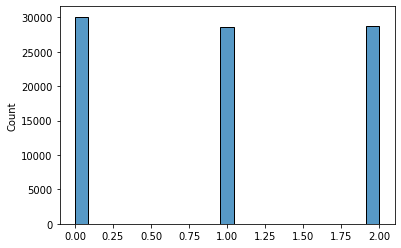

In [ ]:
# Plot the result of an assignation of the original data to single clusters

labels = kmeans.labels_

sns.histplot(labels)

plt.show()

In [ ]:
data_copy['k_labels'] = kmeans.labels_

data_copy

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,total_of_special_requests,people,month,previous_bookings,k_labels
0,0,0,0,0,0.0,0,0,0,7,1,...,0.0,0.0,0.0,0.001180,0.0,0.0,0.036364,0.545455,0.0,1
1,0,0,0,0,0.0,0,0,0,7,1,...,0.0,0.0,0.0,0.001180,0.0,0.0,0.036364,0.545455,0.0,1
2,0,0,0,0,1.0,0,0,0,7,2,...,0.0,0.0,0.0,0.015053,0.0,0.0,0.018182,0.545455,0.0,1
3,0,0,1,1,1.0,0,0,0,7,2,...,0.0,0.0,0.0,0.015053,0.0,0.0,0.018182,0.545455,0.0,1
4,0,0,2,2,1.0,0,0,0,7,3,...,0.0,0.0,0.0,0.019307,0.0,0.2,0.036364,0.545455,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87391,1,0,3,2,1.0,0,0,3,9,6,...,0.0,0.0,0.0,0.018963,0.0,0.0,0.036364,0.636364,0.0,1
87392,1,0,2,2,3.0,0,0,3,9,7,...,0.0,0.0,0.0,0.042877,0.0,0.4,0.054545,0.636364,0.0,1
87393,1,0,2,2,2.0,0,0,3,9,7,...,0.0,0.0,0.0,0.030351,0.0,0.8,0.036364,0.636364,0.0,1
87394,1,0,2,2,1.0,0,0,3,9,7,...,0.0,0.0,0.0,0.020491,0.0,0.0,0.036364,0.636364,0.0,1


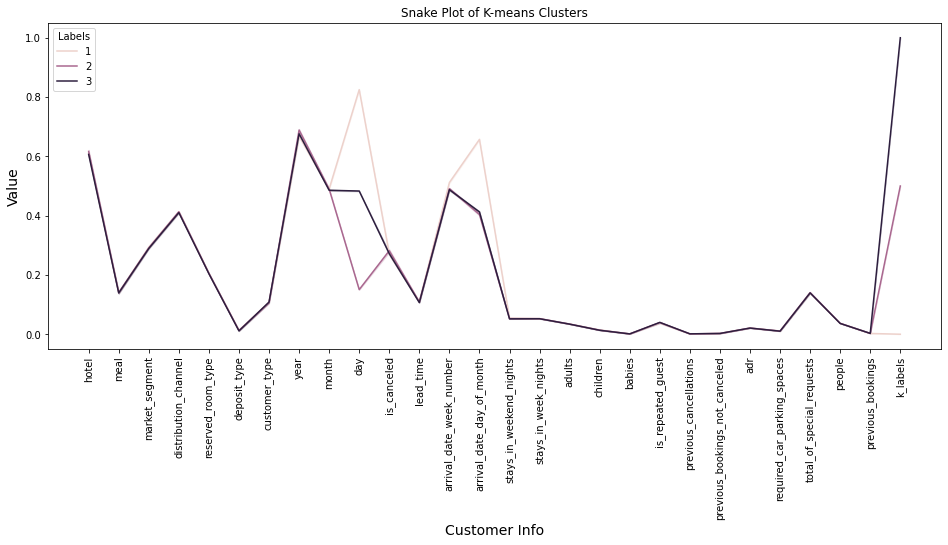

In [ ]:
# Plotting snake plot with all variables

labels = kmeans.labels_

data_snake = data_copy.copy()

scaler = MinMaxScaler()

data_snake = pd.DataFrame(scaler.fit_transform(data_snake), columns = data_snake.columns)

data_snake['Labels'] = labels + 1

data_snake_melt = pd.melt(data_snake.reset_index(),
                          id_vars=['Labels'],
                          value_vars=data_snake.columns,
                          var_name='Customer Info',
                          value_name='Value')

plt.figure(figsize=(16,6))

sns.lineplot(x = 'Customer Info', y = 'Value', hue = 'Labels', data = data_snake_melt)

plt.xticks(rotation=90)

plt.title('Snake Plot of K-means Clusters')

plt.xlabel('Customer Info', size=14)

plt.ylabel('Value', size=14)

plt.show()

The plots show no different patterns amongst 3 clusters concerning their booking patterns and demographics details.

## Applied Deep Learning

Other research ideas:
* Lead time prediction 
* Revenue (ADR) prediction (per day or per period)
* Number of guests (per day or per period)

## Predicting cancellations and No-Shows

### Feature engineering

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'people', 'month',
       'previous_bookings', 'mismanagement', 'is_stayed'],
      dtype='object')

In [ ]:
# Check the relationship between reservation_status and is_canceled
data.loc[df.is_canceled == 1,'reservation_status'].value_counts()

Canceled    23011
No-Show      1014
Name: reservation_status, dtype: int64

In [ ]:
# Drop those features that imply the cancelation status
# get encoded labels
# drop columns which contains nulls, too many values to be encoded (noise), date columns
Y_is_canceled = data['is_canceled']
Y_no_show = data['reservation_status'].map({'Check-Out': 0, 'Canceled': 1,'No-Show':0})

X = data.drop(['is_canceled', 'reservation_status_date', 'is_stayed', 'reservation_status',
               'arrival_date_month','customer_type','mismanagement','country','company','agent'],axis=1)

In [ ]:
# Which columns are our predictors?
X.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'people',
       'month', 'previous_bookings'],
      dtype='object')

In [ ]:
# got categorical columns to convert it in encoded labels
cat_cols = [col for col in X.columns if X[col].dtype == 'O']
cat_df = X[cat_cols]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
# feature encoding / dropping nulls 
X['meal'] = le.fit_transform(X['meal'])

X['market_segment'] = le.fit_transform(X['market_segment'])

X['distribution_channel'] = le.fit_transform(X['distribution_channel'])

X['reserved_room_type'] = le.fit_transform(X['reserved_room_type'])

X['assigned_room_type'] = le.fit_transform(X['assigned_room_type'])

X['deposit_type'] = le.fit_transform(X['deposit_type'])

X['hotel'] = le.fit_transform(X['deposit_type'])

# normalizing numerical variables

X['lead_time'] = np.log(X['lead_time'] + 1)

X['arrival_date_week_number'] = np.log(X['arrival_date_week_number'] + 1)

X['arrival_date_day_of_month'] = np.log(X['arrival_date_day_of_month'] + 1)

X['adr'] = np.log(X['adr'] + 1)

X.isnull().sum()

hotel                             0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
people                            0
month                             0
previous_bookings                 0
dtype: int64

In [ ]:
# cleaning data / filling missing values

# X['adr'] = X['adr'].fillna(value = num_df['adr'].mean()) # fill in one missing values

X.dropna(inplace=True) # drop null rows in the "reserved_room_type"

In [ ]:
X.head()

,hotel,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,people,month,previous_bookings
0,0,1.922456,2015,1.466077,0.526589,0,0,2,0.0,0,...,2,3,0,0,0.000000,0,0,2.0,7,0
1,0,2.028667,2015,1.466077,0.526589,0,0,2,0.0,0,...,2,4,0,0,0.000000,0,0,2.0,7,0
2,0,1.124748,2015,1.466077,0.526589,0,1,1,0.0,0,...,2,0,0,0,1.673489,0,0,1.0,7,0
3,0,1.291725,2015,1.466077,0.526589,0,1,1,0.0,0,...,0,0,0,0,1.673489,0,0,1.0,7,0
4,0,1.310506,2015,1.466077,0.526589,0,2,2,0.0,0,...,0,0,0,0,1.721895,0,1,2.0,7,0


In [ ]:
Y_no_show

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: reservation_status, Length: 87396, dtype: int64

In [ ]:
Y_is_canceled

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87396, dtype: int64

### Designing a function to run a Keras Neural Network pipeline 

The function takes dataframe with predictor variables, labels vector and number of epochs. Then it splits the data using our pre-defined function, designs a network and performs training. Finally, it returns the classification report.

In [ ]:
# Create a function to use the same NN model to predict No-shows and Cancellations
def access_DL_model(X_df,Y_labels,epochs=10):
  trainX,testX,validationX,trainY,testY,validationY=train_test_val_split(X_df,Y_labels)
  print('cancellations / no-shows % in test set')
  print(np.sum(testY)/len(testY))

  # create DL architecture
  model = Sequential()
  model.add(Dense(30,activation='relu',input_shape=trainX.shape[1:]))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
  
  print(model.summary())
  
  early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
  model.fit(x=trainX, 
          y=trainY, 
          epochs=epochs,
          validation_data=(validationX, validationY), verbose=1,callbacks=[early_stop]
          )
  
  y_prob=model.predict(testX)
  y_pred=np.where(y_prob > 0.5, 1,0)
  
  return classification_report(testY,y_pred)
  

### Running the model to predict both No-Shows and Cancellations

Can we learn any common patterns that makes guests cancel their booking? What about No - shows? Let's observe how the model is performing  

In [ ]:
print('Predicting No-shows')
print(access_DL_model(X, Y_no_show))

print('Predicting Cancellations')
print(access_DL_model(X, Y_is_canceled))

Predicting No-shows
cancellations / no-shows % in test set
0.263287373419532
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                840       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1639/1639 [==============================] - 9s 5ms/step - loss: 0.4958 - accuracy: 0.7619 - val_loss: 0.4637 - val_accuracy: 0.7674
Epoch 2/10
1639/1639 [==============================] - 5s 3ms/step - loss: 0.4569 - accurac

### Business Implications of predicting cancellations and show-offs using Deep Learning:

* In the scope of our test, train, and validation set, the model can predict whether the booking will be cancelled with an accuracy of 82 percent. Managers can use this model to allow some percentage of overbookings (when the number of bookings exceeds the room capacity), particularly when logit (probability of true prediction) is close to 1. The probability threshold in the overbooking problem should be carefully chosen by the hospitality expert. 

* However, the first proposed DL model failed to predict any show-offs. Although, this class is extremely rare (about 1 percent in the test set)

## Predicting guests volume in City Hotel using LSTM

### Pre-processing dataframe

First we need to obtain daily arrival volume of guests

In [ ]:
# Calculate daily arrivals
df['arrival_date'] = df['arrival_date_year'].map(str) + '-' + df.month.map(str) + '-' \
                       + df['arrival_date_day_of_month'].map(str)

df['arrival_date'] = pd.to_datetime(df['arrival_date'])   

# Choose the hotel (City or Resort) 
guests_per_day = df.loc[df['hotel_Resort Hotel']==1,['arrival_date', 'people']]
guests_per_day = df['people'].groupby(df['arrival_date']).sum().to_frame()  
scaler = MinMaxScaler()
guests_per_day[guests_per_day.columns] = scaler.fit_transform(guests_per_day)                

### Splitting data into train and test sets, defining function to create sequence needed to feed the LSTM.

In [ ]:
# Create a training and test dataset that trains on the first (chronologically) 80% of datapoints
training_size = round(len(guests_per_day) * 0.80)
train_data = guests_per_day[:training_size]
test_data  = guests_per_day[training_size:]

def create_sequence(dataset,n_steps=10):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(n_steps,len(dataset)): 
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))
n_steps=14
train_seq, train_label = create_sequence(train_data,n_steps)
test_seq, test_label = create_sequence(test_data,n_steps)


### Designing and training LSTM model

In [ ]:
# run the LSTM model
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(units=50, return_sequences=True, 
               input_shape = (train_seq.shape[1], train_seq.shape[2])))

lstm_model.add(keras.layers.Dropout(0.1)) 
lstm_model.add(keras.layers.LSTM(units=50))

lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

lstm_model.summary()


Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_172 (Dense)           (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit the model
lstm_model.fit(train_seq, train_label, epochs=40,validation_data=(test_seq, test_label), verbose=1)

# get the training true and predicted values
train_predicted=lstm_model.predict(train_seq)
train_inverse_predicted = scaler.inverse_transform(train_predicted)

# get the training true and predicted values
test_predicted = lstm_model.predict(test_seq)
test_inverse_predicted = scaler.inverse_transform(test_predicted)

# get the testing true and predicted values
inv_scaled_true_test=scaler.inverse_transform(test_data.iloc[-test_predicted.shape[0]:])
inv_scaled_true_train=scaler.inverse_transform(train_seq[:,0])

Epoch 1/40
20/20 [==============================] - 6s 82ms/step - loss: 0.0448 - mean_absolute_error: 0.1621 - val_loss: 0.0348 - val_mean_absolute_error: 0.1469
Epoch 2/40
20/20 [==============================] - 1s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.1114 - val_loss: 0.0224 - val_mean_absolute_error: 0.1119
Epoch 3/40
20/20 [==============================] - 0s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.1067 - val_loss: 0.0212 - val_mean_absolute_error: 0.1104
Epoch 4/40
20/20 [==============================] - 0s 19ms/step - loss: 0.0180 - mean_absolute_error: 0.1045 - val_loss: 0.0223 - val_mean_absolute_error: 0.1118
Epoch 5/40
20/20 [==============================] - 0s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.1053 - val_loss: 0.0260 - val_mean_absolute_error: 0.1211
Epoch 6/40
20/20 [==============================] - 0s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.1061 - val_loss: 0.0293 - val_mean_absolute_error: 0.1308
Epoch 7/40
20/20 [====

### Plot the resulting forecasts, calculate RMSE

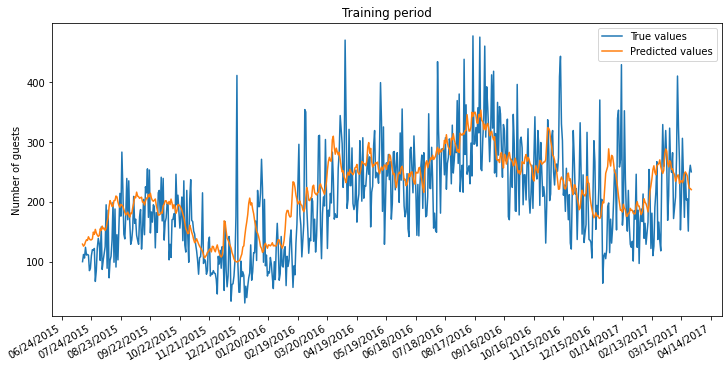

In [ ]:
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
train_dates=list(train_data[n_steps:].index)

plt.plot(train_dates,inv_scaled_true_train,label = "True values")
plt.plot(train_dates,train_inverse_predicted,label = "Predicted values")
plt.gcf().autofmt_xdate()
plt.ylabel('Number of guests')
plt.title('Training period')
plt.legend()
plt.show()

The prediction values have shown similar trends with true values.

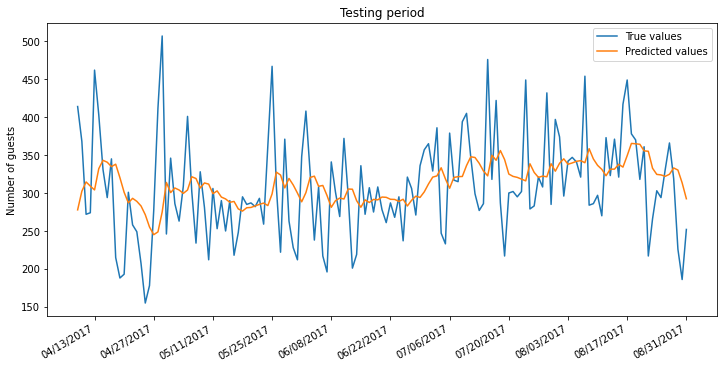

In [ ]:
plt.figure(figsize=(12,6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=14))
test_dates= list(test_data[n_steps:].index)

plt.plot(test_dates,inv_scaled_true_test,label = "True values")
plt.plot(test_dates,test_inverse_predicted,label = "Predicted values")
plt.gcf().autofmt_xdate()
plt.ylabel('Number of guests')
plt.title('Testing period')
plt.legend()
plt.show()

In [ ]:
mse_test = mean_squared_error(inv_scaled_true_test, test_inverse_predicted)
rmse_test = math.sqrt(mse_test)

mse_train = mean_squared_error(inv_scaled_true_train,train_inverse_predicted)
rmse_train = math.sqrt(mse_train)

av_forecast_test=np.repeat(np.average(inv_scaled_true_train),len(inv_scaled_true_test))
mse_av=mean_squared_error(av_forecast_test, inv_scaled_true_test)
rmse_av=math.sqrt(mse_av)

print('RMSE for the test set: %f' % rmse_test)
print('RMSE for the train set: %f' % rmse_train)
print('RMSE for the naive average: %f' % rmse_av)


RMSE for the test set: 67.706259
RMSE for the train set: 67.892300
RMSE for the naive average: 125.110828


### Business implications of the LSTM model

The RMSE (Root-mean-square error) obtained by measuring the LSTM model's performance on the test set is significantly lower than the one obtained by predicting each day as an average derived from the training set. Hospitality managers could more accurately forecast demand and thus allocate resources more efficiently.

## Cancellations Prediction Model with Two-Input Layer


Split the data into training and test set

In [ ]:
# Encoded categorical features
cat_cols = [col for col in df.columns if df[col].dtype == 'O' and col!='reservation_status_date']
df_= pd.get_dummies(df, columns=cat_cols)

In [ ]:
# Get X and Y 
# Drop those features that imply the cancelation status
# drop columns which contains nulls, too many values to be encoded (noise), date columns
Y = df_['is_canceled']
X = df_.drop(["agent","company",'arrival_date_year','arrival_date','arrival_date_week_number','arrival_date_day_of_month','adults','children', 'babies','is_canceled','hotel_City Hotel', 'hotel_Resort Hotel', 'is_stayed','reservation_status_date', 'reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'],axis=1)

In [ ]:
trainX,testX,validationX,trainY,testY,validationY  = train_test_val_split(X,Y)

In [ ]:
trainX.shape, testX.shape, validationX.shape, trainY.shape, testY.shape, validationY.shape

((52437, 252), (17479, 252), (17480, 252), (52437,), (17479,), (17480,))

Set `clear_session` to properly clear out TensorFlow's cache, and define random seeds for `numpy` and `tf`.

In [ ]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(692) # repoducibility 
tf.random.set_seed(367) # repoducibility 

### Significant features : Logistic Regression Coefficients

In [ ]:
# import relevant libraries
from sklearn.linear_model import LogisticRegression

In [ ]:
# logistic regression 

# state the model you want to use
lr = LogisticRegression(max_iter=200, random_state=42)

# put training data in model
lr.fit(trainX, trainY)

# check model works on test data
lr_y_pred = lr.predict(testX)

print("Accuracy is ", accuracy_score(testY,lr_y_pred)*100)

Accuracy is  79.74712512157446


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# create a dataframe of features and their associated logistic regression coefficients: 
coefficients = pd.DataFrame(lr.coef_[0], trainX.columns)
coefficients.rename(columns = {0: 'coef'}, inplace=True)

In [ ]:
# display top 10 features with the stongest coefficients 
top_coef = coefficients[(coefficients['coef'] > 1.64) | (coefficients['coef'] < -3)].copy()
# add exponentiated coefficients 
top_coef['exp'] = np.exp(top_coef['coef'])
# add the percent likelihood calculation to interpret the coefficients 
top_coef['percent'] = (top_coef['exp']-1)*100
top_coef.sort_values('coef')

,coef,exp,percent
required_car_parking_spaces,-19.598808,3.078546e-09,-100.000000
booking_changes,-5.008705,6.679549e-03,-99.332045
total_of_special_requests,-3.373514,3.426901e-02,-96.573099
deposit_type_Non Refund,1.643985,5.175756e+00,417.575614
country_ARE,1.670960,5.317269e+00,431.726927
stays_in_week_nights,3.122988,2.271414e+01,2171.413919
adr,3.453450,3.160925e+01,3060.924630
people,3.540772,3.449354e+01,3349.354288
lead_time,5.238222,1.883349e+02,18733.493289
previous_cancellations,7.024307,1.123616e+03,112261.614450


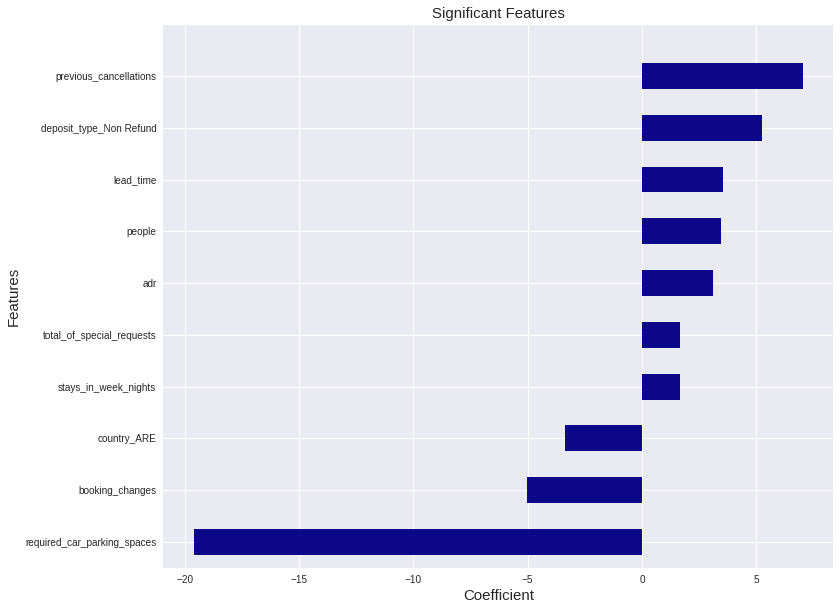

In [ ]:
# visualize the 10 strongest coefficients 
plt.figure(figsize=(12,10), facecolor = 'w')
plt.style.use('seaborn')
top_coef.sort_values(by='coef')['coef'].plot(kind='barh', legend=None, cmap='plasma')
plt.title('Significant Features', size=15)
plt.ylabel('Features', size=15)
plt.xlabel('Coefficient', size=15)
plt.yticks(np.arange(11), ['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations']);

Now that we have extracted some significant features based on logistic regression coefficients, we then parse these 10 features through direct prediction, and the remaining predictors through hidden layers.

Next, we create a deep neural network with TensorFlow's Sequential API in one go. We split input `trainX` to two layers as input-vectors, with input_A layer representing the significant features, and input_B are less significant features. Subsequently, we add two hidden layers and an output layer. We set standard Dense layers and outout layer of one neuron at the output unit for logistic regression. `relu` units are used at the hidden layers and a `sigmoid` unit at the output layer. 

In order to use our model, we have to compile it to automatically perform the forward propagation and back-propagation steps. We have first decided on the optimization algorithm (we will use 'sgd', or "stochastic gradient descent", which is very similar to the gradient descent method. As we have binary classification task here to predict whether or not the booking is cancelled, the loss function (we will use 'binary_crossentropy'). The metrics of 'accuracy' to keep track of as the model is being trained, in the form of a list.




In [ ]:
# modify the model with seperated input layers
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) 

input_A = keras.layers.Input(shape=[10], name='wide_input')
input_B = keras.layers.Input(shape=[242], name='deep_input')
hidden1 = keras.layers.Dense(64, activation='relu')(input_B)
hidden2 = keras.layers.Dense(32, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, activation='sigmoid', name='output')(concat)
model2 = keras.Model(inputs=[input_A, input_B], outputs=[output])

model2.compile(loss='bce', metrics=['binary_accuracy'],
             optimizer='sgd')

X_train_A = trainX[['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations']]
X_train_B = trainX.drop(['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations'],axis=1)
X_valid_A = validationX[['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations']]
X_valid_B = validationX.drop(['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations'],axis=1)
X_test_A = testX[['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations']]
X_test_B = testX.drop(['required_car_parking_spaces', 'booking_changes', 'country_ARE', 
                           'stays_in_week_nights', 'total_of_special_requests', 'adr', 
                           'people','lead_time', 'deposit_type_Non Refund', 'previous_cancellations'],axis=1)

history = model2.fit((X_train_A, X_train_B), 
                      trainY, 
                      batch_size = 256,
                      validation_data=((X_valid_A, X_valid_B), validationY),
                      epochs = 50,
                      verbose = 1,
                    callbacks=[es])

Epoch 1/50
205/205 [==============================] - 19s 87ms/step - loss: 0.6268 - binary_accuracy: 0.7022 - val_loss: 0.5943 - val_binary_accuracy: 0.7251
Epoch 2/50
205/205 [==============================] - 1s 4ms/step - loss: 0.5867 - binary_accuracy: 0.7251 - val_loss: 0.5813 - val_binary_accuracy: 0.7251
Epoch 3/50
205/205 [==============================] - 1s 4ms/step - loss: 0.5754 - binary_accuracy: 0.7251 - val_loss: 0.5708 - val_binary_accuracy: 0.7251
Epoch 4/50
205/205 [==============================] - 1s 4ms/step - loss: 0.5644 - binary_accuracy: 0.7251 - val_loss: 0.5598 - val_binary_accuracy: 0.7251
Epoch 5/50
205/205 [==============================] - 1s 4ms/step - loss: 0.5527 - binary_accuracy: 0.7251 - val_loss: 0.5484 - val_binary_accuracy: 0.7251
Epoch 6/50
205/205 [==============================] - 1s 4ms/step - loss: 0.5413 - binary_accuracy: 0.7250 - val_loss: 0.5377 - val_binary_accuracy: 0.7253
Epoch 7/50
205/205 [==============================] - 1s 4ms/s

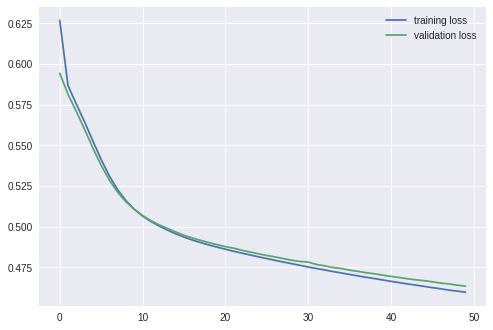

In [ ]:
# display the loss on both the training and the validation set
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

Then, we use log to see how the training went. The log.history is a dictionary that will capture, for each epoch, all the metrics we defined for our model (['accuracy'] in our case), as well as the cost/loss, for both the training and the "validation" dataset. The keywords to use in the dictionary are simply the words you can find in the log above.

In [ ]:
# evalute the model on test set
mse_test = model2.evaluate((X_test_A, X_test_B), testY)

547/547 [==============================] - 1s 2ms/step - loss: 0.4634 - binary_accuracy: 0.7605


In [ ]:
y_pred2 = model2.predict((X_test_A, X_test_B))
y_pred2

array([[0.01847461],
       [0.28505737],
       [0.4723416 ],
       ...,
       [0.45473093],
       [0.45866612],
       [0.32872033]], dtype=float32)

### Business Implications 

As we can see the performance of modified cancellations predictive model is at 76.37% test accuracy. This has verified that those important features extracted from logistic coefficients carry more weights such as require parking spaces, previous cancellations, non redundable deposit type, lead time and booking changes. With accurate predictive models and important features, we can then further supplement the analysis for more detailed customer profiling that is to find out which cluster is likely and not likely to cancel bookings based on direct predictors. These are crucial steps for future targeted marketing and resource management purposes, and this can be conducted with popular clustering methods of unsupervised machine learning. 


## Weekly ADR prediction

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Using time series analysis, let us assume that the hotel wishes to <br>
1) calculate the average ADR value across all bookings for a given week and <br>
2) use this data to forecast future weekly ADR trends — by weekly ADR I mean the average ADR across all bookings in any one week — hereafter referred to as “weekly ADR”

the full date (year and week number) is joined with the corresponding ADR Value for each booking.

In [ ]:
# make dataset 
c=df.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)
c=pd.DataFrame(c)
df1 = df['arrival_date_year'].map(str) + df['arrival_date_week_number'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0         201527
1         201527
2         201527
3         201527
4         201527
           ...  
119385    201735
119386    201735
119387    201735
119388    201735
119389    201735
Length: 87396, dtype: object


In [ ]:
df2 = pd.DataFrame(c, columns= ['adr']) 
df2

,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [ ]:
df3 = pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [ ]:
# preprocessing
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.0
1,201527,0.0
125,201527,0.0
40060,201527,0.0
14463,201527,4.0
...,...,...
106740,20179,208.2
106686,20179,221.4
107144,20179,223.0
107055,20179,248.0


In [ ]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,94.329633
201528,100.819943
201529,117.625445
201530,118.842349
201531,128.707403
...,...
20175,71.931733
20176,75.968300
20177,80.969046


In [ ]:
tseries=df4['ADR']
tseries

FullDate
201527     94.329633
201528    100.819943
201529    117.625445
201530    118.842349
201531    128.707403
             ...    
20175      71.931733
20176      75.968300
20177      80.969046
20178      79.612816
20179      81.913648
Name: ADR, Length: 115, dtype: float64

In [ ]:
#ARIMA models (basseline)
res = sm.tsa.ARMA(tseries, (1,1)).fit(disp=-1)
sm.stats.acorr_ljungbox(res.resid, lags=[10])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



(array([4.51827964]), array([0.92095353]))

In [ ]:
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.024082
p-value: 0.032706
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582


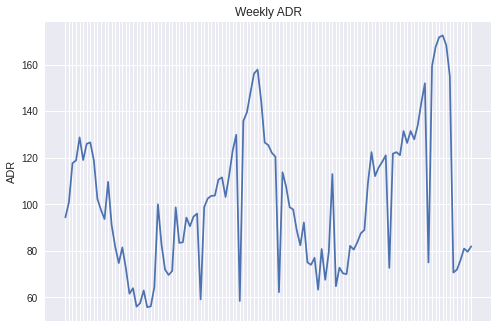

In [ ]:
# check weekly trend
plt.plot(tseries)
plt.tick_params(
    axis='x',         
    which='both',     
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.ylabel('ADR')
plt.title("Weekly ADR")
plt.show()

In [ ]:
df_tmp=pd.DataFrame(tseries)
df_tmp

,ADR
FullDate,
201527,94.329633
201528,100.819943
201529,117.625445
201530,118.842349
201531,128.707403
...,...
20175,71.931733
20176,75.968300
20177,80.969046


In [ ]:
df_np=np.array(df_tmp)

In [ ]:
train_size = int(len(df_np) * 0.8)
val_size = len(df_np) - train_size
train, val = df_np[0:train_size,:], df_np[train_size:len(df_np),:]

In [ ]:
# function to create timeseries dataset
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
df_np

array([[ 94.32963303],
       [100.81994253],
       [117.62544474],
       [118.84234867],
       [128.70740291],
       [118.99469008],
       [125.96235562],
       [126.53433155],
       [118.84561069],
       [102.28507911],
       [ 97.58503715],
       [ 93.6192518 ],
       [109.62120944],
       [ 91.02463845],
       [ 81.75339972],
       [ 74.71921769],
       [ 81.45608761],
       [ 72.50465553],
       [ 61.61018648],
       [ 63.95267692],
       [ 56.01906475],
       [ 57.51263279],
       [ 62.95635644],
       [ 55.77486928],
       [ 56.17592593],
       [ 64.47067442],
       [ 99.98701128],
       [ 82.78823129],
       [ 71.95196129],
       [ 69.60688378],
       [ 71.32341232],
       [ 98.6367425 ],
       [ 83.39509248],
       [ 83.67865724],
       [ 94.25586931],
       [ 90.54826334],
       [ 94.67091457],
       [ 95.97405868],
       [ 59.1229805 ],
       [ 98.7580611 ],
       [102.47183778],
       [103.59060519],
       [103.72496257],
       [110

In [ ]:
# The data is then normalized with MinMaxScaler in order to allow the neural network to interpret it properly
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
train

array([[0.377808  ],
       [0.44140821],
       [0.60608963],
       [0.61801438],
       [0.71468457],
       [0.61950721],
       [0.68778515],
       [0.69339009],
       [0.61804635],
       [0.45576546],
       [0.40970854],
       [0.3708468 ],
       [0.52765408],
       [0.34542152],
       [0.25457027],
       [0.18564052],
       [0.25165684],
       [0.16393946],
       [0.05718177],
       [0.08013643],
       [0.00239293],
       [0.01702879],
       [0.07037323],
       [0.        ],
       [0.00393006],
       [0.08521242],
       [0.4332461 ],
       [0.26471085],
       [0.15852347],
       [0.13554345],
       [0.15236416],
       [0.42001447],
       [0.27065764],
       [0.27343636],
       [0.37708517],
       [0.34075339],
       [0.38115231],
       [0.39392215],
       [0.032809  ],
       [0.4212033 ],
       [0.45759555],
       [0.46855864],
       [0.46987524],
       [0.5370143 ],
       [0.54632713],
       [0.46406195],
       [0.55439226],
       [0.658

In [ ]:
val = scaler.fit_transform(val)
val

array([[0.50105416],
       [0.50744766],
       [0.49487741],
       [0.59643969],
       [0.54638311],
       [0.5965021 ],
       [0.5618168 ],
       [0.62186592],
       [0.716904  ],
       [0.79806228],
       [0.04245133],
       [0.87037094],
       [0.95063274],
       [0.99233337],
       [1.        ],
       [0.95905651],
       [0.82885444],
       [0.        ],
       [0.01233342],
       [0.05197352],
       [0.10108207],
       [0.08776356],
       [0.1103583 ]])

When the Lookback period is set to 5, this essentially means that the value at time t (Y_train for the training data), is being predicted using the values t-1, t-2, t-3, t-4, and t-5 (all under X_train)

In [ ]:
# Lookback period
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_val, Y_val = create_dataset(val, lookback)

In [ ]:
X_train

array([[0.377808  , 0.44140821, 0.60608963, 0.61801438, 0.71468457],
       [0.44140821, 0.60608963, 0.61801438, 0.71468457, 0.61950721],
       [0.60608963, 0.61801438, 0.71468457, 0.61950721, 0.68778515],
       [0.61801438, 0.71468457, 0.61950721, 0.68778515, 0.69339009],
       [0.71468457, 0.61950721, 0.68778515, 0.69339009, 0.61804635],
       [0.61950721, 0.68778515, 0.69339009, 0.61804635, 0.45576546],
       [0.68778515, 0.69339009, 0.61804635, 0.45576546, 0.40970854],
       [0.69339009, 0.61804635, 0.45576546, 0.40970854, 0.3708468 ],
       [0.61804635, 0.45576546, 0.40970854, 0.3708468 , 0.52765408],
       [0.45576546, 0.40970854, 0.3708468 , 0.52765408, 0.34542152],
       [0.40970854, 0.3708468 , 0.52765408, 0.34542152, 0.25457027],
       [0.3708468 , 0.52765408, 0.34542152, 0.25457027, 0.18564052],
       [0.52765408, 0.34542152, 0.25457027, 0.18564052, 0.25165684],
       [0.34542152, 0.25457027, 0.18564052, 0.25165684, 0.16393946],
       [0.25457027, 0.18564052, 0.

In [ ]:
Y_train

array([0.61950721, 0.68778515, 0.69339009, 0.61804635, 0.45576546,
       0.40970854, 0.3708468 , 0.52765408, 0.34542152, 0.25457027,
       0.18564052, 0.25165684, 0.16393946, 0.05718177, 0.08013643,
       0.00239293, 0.01702879, 0.07037323, 0.        , 0.00393006,
       0.08521242, 0.4332461 , 0.26471085, 0.15852347, 0.13554345,
       0.15236416, 0.42001447, 0.27065764, 0.27343636, 0.37708517,
       0.34075339, 0.38115231, 0.39392215, 0.032809  , 0.4212033 ,
       0.45759555, 0.46855864, 0.46987524, 0.5370143 , 0.54632713,
       0.46406195, 0.55439226, 0.65849316, 0.72571437, 0.02616315,
       0.78421374, 0.81963291, 0.9033952 , 0.98344814, 1.        ,
       0.86969738, 0.69315206, 0.68203018, 0.64990786, 0.63353168,
       0.0632991 , 0.56784823, 0.50802146, 0.42085926, 0.41131362,
       0.32368704, 0.26069755, 0.35654601, 0.1886264 , 0.17844318,
       0.20784756, 0.07379267, 0.24500571, 0.11538828, 0.23247761,
       0.56020424, 0.08832588, 0.16616393, 0.14222521, 0.13926

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

In [ ]:
X_train.shape[0]

86

In [ ]:
X_train.shape[1]

Epoch 1/100
68/68 - 2s - loss: 0.0929 - val_loss: 0.0458 - 2s/epoch - 33ms/step
Epoch 2/100
68/68 - 0s - loss: 0.0502 - val_loss: 0.0264 - 191ms/epoch - 3ms/step
Epoch 3/100
68/68 - 0s - loss: 0.0378 - val_loss: 0.0228 - 144ms/epoch - 2ms/step
Epoch 4/100
68/68 - 0s - loss: 0.0357 - val_loss: 0.0214 - 138ms/epoch - 2ms/step
Epoch 5/100
68/68 - 0s - loss: 0.0350 - val_loss: 0.0204 - 147ms/epoch - 2ms/step
Epoch 6/100
68/68 - 0s - loss: 0.0343 - val_loss: 0.0207 - 144ms/epoch - 2ms/step
Epoch 7/100
68/68 - 0s - loss: 0.0340 - val_loss: 0.0208 - 147ms/epoch - 2ms/step
Epoch 8/100
68/68 - 0s - loss: 0.0331 - val_loss: 0.0206 - 137ms/epoch - 2ms/step
Epoch 9/100
68/68 - 0s - loss: 0.0329 - val_loss: 0.0202 - 141ms/epoch - 2ms/step
Epoch 10/100
68/68 - 0s - loss: 0.0324 - val_loss: 0.0214 - 136ms/epoch - 2ms/step
Epoch 11/100
68/68 - 0s - loss: 0.0326 - val_loss: 0.0216 - 148ms/epoch - 2ms/step
Epoch 12/100
68/68 - 0s - loss: 0.0320 - val_loss: 0.0208 - 198ms/epoch - 3ms/step
Epoch 13/100
68

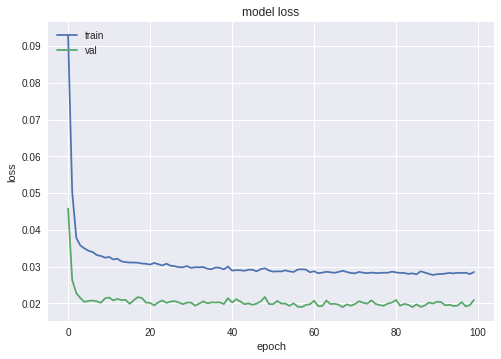

In [ ]:
# Generate LSTM network
model = tf.keras.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)

# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [ ]:
trainpred

array([[0.6078636 ],
       [0.5954094 ],
       [0.6014671 ],
       [0.6141441 ],
       [0.57879245],
       [0.5048528 ],
       [0.44047517],
       [0.3937684 ],
       [0.43308255],
       [0.39169618],
       [0.32935247],
       [0.2637313 ],
       [0.25098646],
       [0.21097186],
       [0.15019771],
       [0.11913887],
       [0.08068607],
       [0.05779081],
       [0.06170585],
       [0.04951687],
       [0.03576905],
       [0.05968293],
       [0.21767423],
       [0.25425577],
       [0.22298826],
       [0.18708146],
       [0.17884105],
       [0.2695181 ],
       [0.27774736],
       [0.28239352],
       [0.32186013],
       [0.32879773],
       [0.3510787 ],
       [0.36841813],
       [0.23073973],
       [0.29838258],
       [0.36053348],
       [0.41091222],
       [0.4441389 ],
       [0.47491977],
       [0.49535424],
       [0.47082084],
       [0.49384552],
       [0.54782426],
       [0.60716236],
       [0.350632  ],
       [0.50730276],
       [0.623

In [ ]:
valpred

array([[0.51363087],
       [0.53390974],
       [0.5313413 ],
       [0.5461015 ],
       [0.60234576],
       [0.6601656 ],
       [0.38048267],
       [0.5534289 ],
       [0.70125   ],
       [0.7777386 ],
       [0.8956832 ],
       [0.7934321 ],
       [0.7243004 ],
       [0.38957748],
       [0.24100475],
       [0.16473605],
       [0.12022832]], dtype=float32)

In [ ]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [ ]:
# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 16.46 RMSE
Validation Score: 32.29 RMSE


In [ ]:
# Train predictions
trainpredPlot = np.empty_like(df_np)
trainpredPlot[:, :] = np.nan
trainpredPlot[lookback:len(trainpred)+lookback, :] = trainpred

In [ ]:
# Validation predictions
valpredPlot = np.empty_like(df_np)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(lookback*2)+1:len(df_np)-1, :] = valpred

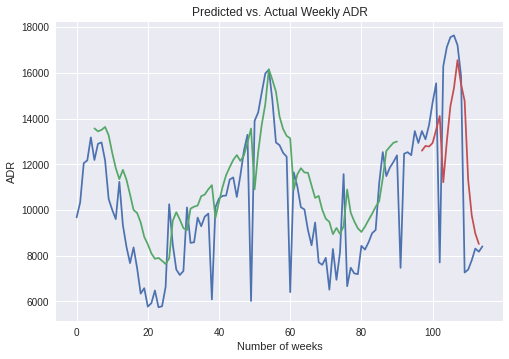

In [ ]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df_np))
trainpred, =plt.plot(scaler.inverse_transform(trainpredPlot))
valpred, =plt.plot(scaler.inverse_transform(valpredPlot))
plt.xlabel('Number of weeks')
plt.ylabel('ADR')
plt.title("Predicted vs. Actual Weekly ADR")
plt.show()

Here is how an LSTM model can be used to forecast the ADR (average daily rate) for hotels <br>

from the above chart and RMSE, we can deduce that it's possible to model weekly ADR